In [1]:
from ppp_prediction.MultiOmicsDiseasePrediction import (
    LassoTrainTFPipline,
    LassoConfig,
    ModelConfig,
    DataConfig,
    check_disease_dist,
)

In [2]:
# Necessary Params to pass by cmd
outputFolder = "test"

# defined in the json
ukbData = "MulitOmicsDisease/"
ProtTrainDir = f"{ukbData}/traindata/Prot.feather"
MetaTrainDir = f"{ukbData}/traindata/Meta.feather"
RFTrainDir = f"{ukbData}/traindata/RF.feather"
heldOutDataDir = f"{ukbData}/traindata/heldout.feather"

phenoDataDir = f"{ukbData}/omicsData/phenos.feather"
diseaseDataDir = f"{ukbData}/disease/T2D_Coding_Amit_NG2018.feather"

cov = ["age", "sex"]

params_json = {
    "omicsData": {
        "Prot": {
            "name": "Prot",
            "path": MetaTrainDir,
            "feature": None,
        },
        "Meta": {
            "name": "Meta",
            "path": MetaTrainDir,
            "feature": None,
        },
        "RF": {
            "name": "RF",
            "path": RFTrainDir,
            "feature": None,
        },
    },
    "heldOutData": {
        "name": "heldOut",
        "path": heldOutDataDir,
    },
    "diseaseData": {
        # "name": "T2D_Coding_Amit_NG2018",
        "path": diseaseDataDir,
        "label": "event",
        "date": "date",
    },
    "phenosData": {
        "name": "phenos",
        "path": phenoDataDir,
    },
    "modelConfig": {
        "Prot": {
            "name": "Prot",  # name of the model for save
            "model": ["lasso"],  # not work now
            "feature": None,  # feature to use, None is all
            "cov": cov,  # covariate to use
            "cv": 10,  # cv
            "n_bootstrap": 8,
        },
        "Meta": {
            "name": "Meta",
            "model": ["lasso"],
            "feature": None,
            "cov": cov,
            "cv": 10,
            "n_bootstrap": 8,
        },
        "RF": {
            "name": "RF",
            "model": ["lasso"],
            "feature": None,
            "cov": None,
            "cv": 10,
            "n_bootstrap": None,
        },
    },
}

In [3]:
OmicsDataDirDict = {k: DataConfig(**v) for k, v in params_json["omicsData"].items()}
heldOutDataDict = DataConfig(**params_json["heldOutData"])
diseaseDict = DataConfig(**params_json["diseaseData"])
phenosDataDict = DataConfig(**params_json["phenosData"])
modelconfig = {k: ModelConfig(**v) for k, v in params_json["modelConfig"].items()}

Config = {
    "omicsData": OmicsDataDirDict,
    "heldOutData": heldOutDataDict,
    "diseaseData": diseaseDict,
    "phenosData": phenosDataDict,
    "modelConfig": modelconfig,
}

In [4]:
mmconfig = Config["modelConfig"]["Meta"]
dataconfig = Config["omicsData"]["Meta"]
tgtconfig = Config["diseaseData"]
phenoconfig = Config["phenosData"]
testconfig = Config["heldOutData"]

In [5]:
# load_data

for k in Config.keys():
    if isinstance(Config[k], DataConfig):
        Config[k].__load_data__()
    elif k == "omicsData":
        for omics in Config["omicsData"]:
            Config["omicsData"][omics].__load_data__()
    else:
        print(f"Skipping {k}")

Loading data: Prot


Loading data: Meta
Loading data: RF
Loading data: heldOut
Loading data: T2D_Coding_Amit_NG2018
Loading data: phenos
Skipping modelConfig


In [6]:
dist_df = check_disease_dist(Config)
dist_df

,Prot,Meta,RF,heldOut
0.0,211032,211032,430898,25998
1.0,15500,15500,31374,2002


In [7]:
# check features
for mconfig in Config["modelConfig"].values():
    if mconfig["feature"] is None:
        # if mconfig["name"] in ["Prot", "Meta"]:
        mconfig["feature"] = (
            Config["omicsData"][mconfig["name"]].data.columns[1:].tolist()
        )
        print(f"Set feature for {mconfig['name']}")
        # else:
        #     raise ValueError(f"Feature for {mconfig['name']} is not set")

Set feature for Prot
Set feature for Meta
Set feature for RF


In [8]:
# check cov
for mconfig in Config["modelConfig"].values():
    cov = mconfig["cov"]
    if cov is not None:
        if Config["phenosData"] is None:
            raise ValueError(
                f"PhenosData is not set, while covariates are set for {mconfig['name']}"
            )
        else:
            for c in cov:
                if c not in Config["phenosData"].data.columns:
                    raise ValueError(
                        f"cov of {mconfig['name']}, {c} not in phenosData columns"
                    )
        for c in cov:
            if c not in Config["heldOutData"].data.columns:
                raise ValueError(
                    f"cov of {mconfig['name']}, {c} not in heldOutData columns"
                )

Running Prot
Output folder: test/T2D_Coding_Amit_NG2018/Prot
Train data shape: (10000, 174)
Test data shape: (28000, 174)
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/single --test test/T2D_Coding_Amit_NG2018/Prot/test.feather


Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/Prot/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Prot/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Prot/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Prot/single"

$help
[1] FALSE

[1] "train data size: 10000"
[1] "json_file have keys: 1"
[1] "Processing Prot"
[1] TRUE
[1] "train data size: 10000 with featuers 172"
Training
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |====================================

Warning message:
executing %dopar% sequentially: no parallel backend registered 


run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/bootstrap/1 --test test/T2D_Coding_Amit_NG2018/Prot/test.feather --seed 1
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/bootstrap/4 --test test/T2D_Coding_Amit_NG2018/Prot/test.feather --seed 4
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/bootstrap/2 --test test/T2D_Coding_Amit_NG2018/Prot/test.feather --seed 2
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/bootstrap/3 --test test/T2D_Coding_Amit_NG2018/Prot/test.feather --seed 3


Loaded glmnet 4.1-8
Loaded glmnet 4.1-8
Loaded glmnet 4.1-8
Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘arrow’

The

$train
[1] "test/T2D_Coding_Amit_NG2018/Prot/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Prot/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Prot/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Prot/bootstrap/4"

$seed
[1] 4

$help
[1] FALSE

$train
[1] "test/T2D_Coding_Amit_NG2018/Prot/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Prot/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Prot/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Prot/bootstrap/3"

$seed
[1] 3

$help
[1] FALSE

$train
[1] "test/T2D_Coding_Amit_NG2018/Prot/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Prot/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Prot/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Prot/bootstrap/1"

$seed
[1] 1

$help
[1] FALSE

[1] "train data size: 6348"
[1] "json_file have keys: 1"
[1] "train data size: 6316"
[1] "train data size: 6317"
[1] "json_file have keys: 1"
[1] "json_file have keys: 1"
$train



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "train data size: 6353"
[1] "json_file have keys: 1"
[1] "Processing Prot"
[1] TRUE
[1] "Processing Prot"
[1] "Processing Prot"
[1] TRUE
[1] TRUE
[1] "Processing Prot"
[1] TRUE
[1] "train data size: 6348 with featuers 172"
Training
  |====                                                                  |   5%[1] "train data size: 6317 with featuers 172"
  |======                                                                |   8%Training
  |==========                                                            |  15%[1] "train data size: 6316 with featuers 172"
  |==                                                                    |   3%Training
  |=================                                                     |  24% "train data size: 6353 with featuers 172"
  |==================                                                    |  25%Training
  |======================================================================| 100%
  |                                             

Warning message:
executing %dopar% sequentially: no parallel backend registered 


run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/bootstrap/5 --test test/T2D_Coding_Amit_NG2018/Prot/test.feather --seed 5


Warning message:
executing %dopar% sequentially: no parallel backend registered 


run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/bootstrap/6 --test test/T2D_Coding_Amit_NG2018/Prot/test.feather --seed 6


Warning message:
executing %dopar% sequentially: no parallel backend registered 
Loaded glmnet 4.1-8


run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/bootstrap/7 --test test/T2D_Coding_Amit_NG2018/Prot/test.feather --seed 7


Loaded glmnet 4.1-8
Warning message:
executing %dopar% sequentially: no parallel backend registered 
Loaded glmnet 4.1-8


run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/bootstrap/8 --test test/T2D_Coding_Amit_NG2018/Prot/test.feather --seed 8



Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/Prot/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Prot/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Prot/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Prot/bootstrap/5"

$seed
[1] 5

$help
[1] FALSE

[1] "train data size: 6318"
[1] "json_file have keys: 1"
[1] "Processing Prot"
[1] TRUE


Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/Prot/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Prot/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Prot/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Prot/bootstrap/6"

$seed
[1] 6

$help
[1] FALSE

[1] "train data size: 6306"
[1] "json_file have keys: 1"



Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/Prot/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Prot/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Prot/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Prot/bootstrap/7"

$seed
[1] 7

$help
[1] FALSE

[1] "train data size: 6295"
[1] "Processing Prot"
[1] "json_file have keys: 1"
[1] TRUE
[1] "Processing Prot"
[1] TRUE
[1] "train data size: 6318 with featuers 172"
Training
  |======================================                                |  55%$train
[1] "test/T2D_Coding_Amit_NG2018/Prot/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Prot/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Prot/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Prot/bootstrap/8"

$seed
[1] 8

$help
[1] FALSE

  |=======================================                               |  56%[1] "train data size: 6382"



Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "json_file have keys: 1"
  |======================================================================| 100%
  |==========                                                            |  15%[1] "Processing Prot"
  |=============                                                         |  19%[1] "train data size: 6306 with featuers 172"
  |===============                                                       |  21%Training
  |================                                                      |  23%[1] TRUE
  |==============================                                        |  43%[1] "train data size: 6295 with featuers 172"
  |===============================                                       |  44%Training
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |================================ 

Warning message:
executing %dopar% sequentially: no parallel backend registered 


  |======================================================================| 100%
  |=======================================================               |  78%

Warning message:
executing %dopar% sequentially: no parallel backend registered 


  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Warning message:
executing %dopar% sequentially: no parallel backend registered 
Warning message:
executing %dopar% sequentially: no parallel backend registered 
/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/MultiOmicsDiseasePrediction.py:340: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, 100], [0, 0], "k--", lw=3, color="grey")
/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/MultiOmicsDiseasePrediction.py:277: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2244: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/xutingfeng/miniforge3/env

run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Prot/non_zero_features_train_config.json --train test/T2D_Coding_Amit_NG2018/Prot/train.feather --out test/T2D_Coding_Amit_NG2018/Prot/non_zero_features --test test/T2D_Coding_Amit_NG2018/Prot/test.feather


Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/Prot/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Prot/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Prot/non_zero_features_train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Prot/non_zero_features"

$help
[1] FALSE

[1] "train data size: 10000"
[1] "json_file have keys: 1"
[1] "Processing Prot"
[1] TRUE
[1] "train data size: 10000 with featuers 109"
Training
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=======

Warning message:
executing %dopar% sequentially: no parallel backend registered 


Finished!
Running Meta
Output folder: test/T2D_Coding_Amit_NG2018/Meta
Train data shape: (10000, 174)
Test data shape: (28000, 174)
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Meta/train_config.json --train test/T2D_Coding_Amit_NG2018/Meta/train.feather --out test/T2D_Coding_Amit_NG2018/Meta/single --test test/T2D_Coding_Amit_NG2018/Meta/test.feather


Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/Meta/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Meta/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Meta/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Meta/single"

$help
[1] FALSE

[1] "train data size: 10000"
[1] "json_file have keys: 1"
[1] "Processing Meta"
[1] TRUE
[1] "train data size: 10000 with featuers 172"
Training
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |====================================

Warning message:
executing %dopar% sequentially: no parallel backend registered 


run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Meta/train_config.json --train test/T2D_Coding_Amit_NG2018/Meta/train.feather --out test/T2D_Coding_Amit_NG2018/Meta/bootstrap/1 --test test/T2D_Coding_Amit_NG2018/Meta/test.feather --seed 1
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Meta/train_config.json --train test/T2D_Coding_Amit_NG2018/Meta/train.feather --out test/T2D_Coding_Amit_NG2018/Meta/bootstrap/2 --test test/T2D_Coding_Amit_NG2018/Meta/test.feather --seed 2
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Meta/train_config.json --train test/T2D_Coding_Amit_NG2018/Meta/train.feather --out test/T2D_Coding_Amit_NG2018/Meta/bootstrap/3 --test test/T2D_Coding_Amit_NG2018/Meta/test.feather --seed 3
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Meta/train_config.json --train test/T2D_Coding_Amit_NG2018/Meta/train.feather --out test/T2D_Coding_Amit_NG2018/Meta/bootstrap/4 --test test/T2D_Coding_Amit_NG2018/Meta/test.feather --seed 4


Loaded glmnet 4.1-8
Loaded glmnet 4.1-8
Loaded glmnet 4.1-8
Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘arrow’


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘arrow’

The

$train
[1] "test/T2D_Coding_Amit_NG2018/Meta/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Meta/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Meta/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Meta/bootstrap/1"

$seed
[1] 1

$help
[1] FALSE

$train
[1] "test/T2D_Coding_Amit_NG2018/Meta/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Meta/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Meta/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Meta/bootstrap/4"

$seed
[1] 4

$help
[1] FALSE

[1]$train
[1] "train data size: 6316"
 "test/T2D_Coding_Amit_NG2018/Meta/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Meta/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Meta/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Meta/bootstrap/3"

$seed
[1] 3

$help
[1] FALSE

[1] "json_file have keys: 1"
[1] "train data size: 6348"
[1] "json_file have keys: 1"
[1] "train data size: 6317"
$train
[1] "test/T2D_Coding_Amit_NG2

Warning message:
executing %dopar% sequentially: no parallel backend registered 
Loaded glmnet 4.1-8
Warning message:
executing %dopar% sequentially: no parallel backend registered 


run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Meta/train_config.json --train test/T2D_Coding_Amit_NG2018/Meta/train.feather --out test/T2D_Coding_Amit_NG2018/Meta/bootstrap/6 --test test/T2D_Coding_Amit_NG2018/Meta/test.feather --seed 6
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Meta/train_config.json --train test/T2D_Coding_Amit_NG2018/Meta/train.feather --out test/T2D_Coding_Amit_NG2018/Meta/bootstrap/7 --test test/T2D_Coding_Amit_NG2018/Meta/test.feather --seed 7


Warning message:
executing %dopar% sequentially: no parallel backend registered 
Warning message:
executing %dopar% sequentially: no parallel backend registered 
Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loaded glmnet 4.1-8


run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Meta/train_config.json --train test/T2D_Coding_Amit_NG2018/Meta/train.feather --out test/T2D_Coding_Amit_NG2018/Meta/bootstrap/8 --test test/T2D_Coding_Amit_NG2018/Meta/test.feather --seed 8
$train
[1] "test/T2D_Coding_Amit_NG2018/Meta/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Meta/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Meta/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Meta/bootstrap/5"

$seed
[1] 5

$help
[1] FALSE

[1] "train data size: 6318"
[1] "json_file have keys: 1"
[1] "Processing Meta"
[1] TRUE


Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/Meta/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Meta/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Meta/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Meta/bootstrap/6"

$seed
[1] 6

$help
[1] FALSE

[1] "train data size: 6306"
[1] "json_file have keys: 1"
$train
[1] "test/T2D_Coding_Amit_NG2018/Meta/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Meta/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Meta/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Meta/bootstrap/7"

$seed
[1] 7

$help
[1] FALSE




Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "train data size: 6295"
[1] "json_file have keys: 1"
[1] "train data size: 6318 with featuers 172"
Training
  |=======                                                               |  10%[1] "Processing Meta"
  |=================                                                     |  24%[1] TRUE
  |============================                                          |  40%[1] "Processing Meta"
  |===============================                                       |  44%[1] TRUE
  |======================================================================| 100%



Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/Meta/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Meta/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Meta/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Meta/bootstrap/8"

$seed
[1] 8

$help
[1] FALSE

  |======                                                                |   9%[1] "train data size: 6382"
  |===========                                                           |  16%[1] "json_file have keys: 1"
  |=================================                                     |  47%[1] "Processing Meta"
  |==================================                                    |  48%[1] TRUE
  |====================================                                  |  51%[1] "train data size: 6306 with featuers 172"
Training
  |===========================                                           |  38%[1] "train data size: 6295 with featuers 172"
  |===========================                                 

Warning message:
executing %dopar% sequentially: no parallel backend registered 


  |======================================================================| 100%
  |=====================================================                 |  76%

Warning message:
executing %dopar% sequentially: no parallel backend registered 


  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Warning message:
executing %dopar% sequentially: no parallel backend registered 
Warning message:
executing %dopar% sequentially: no parallel backend registered 
/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/MultiOmicsDiseasePrediction.py:340: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, 100], [0, 0], "k--", lw=3, color="grey")
/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/MultiOmicsDiseasePrediction.py:277: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2244: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/xutingfeng/miniforge3/env

run_glmnet.R --json test/T2D_Coding_Amit_NG2018/Meta/non_zero_features_train_config.json --train test/T2D_Coding_Amit_NG2018/Meta/train.feather --out test/T2D_Coding_Amit_NG2018/Meta/non_zero_features --test test/T2D_Coding_Amit_NG2018/Meta/test.feather


Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/Meta/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/Meta/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/Meta/non_zero_features_train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/Meta/non_zero_features"

$help
[1] FALSE

[1] "train data size: 10000"
[1] "json_file have keys: 1"
[1] "Processing Meta"
[1] TRUE
[1] "train data size: 10000 with featuers 109"
Training
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=======

Warning message:
executing %dopar% sequentially: no parallel backend registered 


Finished!
Running RF
Output folder: test/T2D_Coding_Amit_NG2018/RF
Train data shape: (10000, 12)
Test data shape: (28000, 12)
run_glmnet.R --json test/T2D_Coding_Amit_NG2018/RF/train_config.json --train test/T2D_Coding_Amit_NG2018/RF/train.feather --out test/T2D_Coding_Amit_NG2018/RF/single --test test/T2D_Coding_Amit_NG2018/RF/test.feather


Loaded glmnet 4.1-8

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



$train
[1] "test/T2D_Coding_Amit_NG2018/RF/train.feather"

$test
[1] "test/T2D_Coding_Amit_NG2018/RF/test.feather"

$json
[1] "test/T2D_Coding_Amit_NG2018/RF/train_config.json"

$output
[1] "test/T2D_Coding_Amit_NG2018/RF/single"

$help
[1] FALSE

[1] "train data size: 10000"
[1] "json_file have keys: 1"
[1] "Processing RF"
[1] TRUE
[1] "train data size: 9998 with featuers 10"
Training
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |================================================

Warning message:
executing %dopar% sequentially: no parallel backend registered 


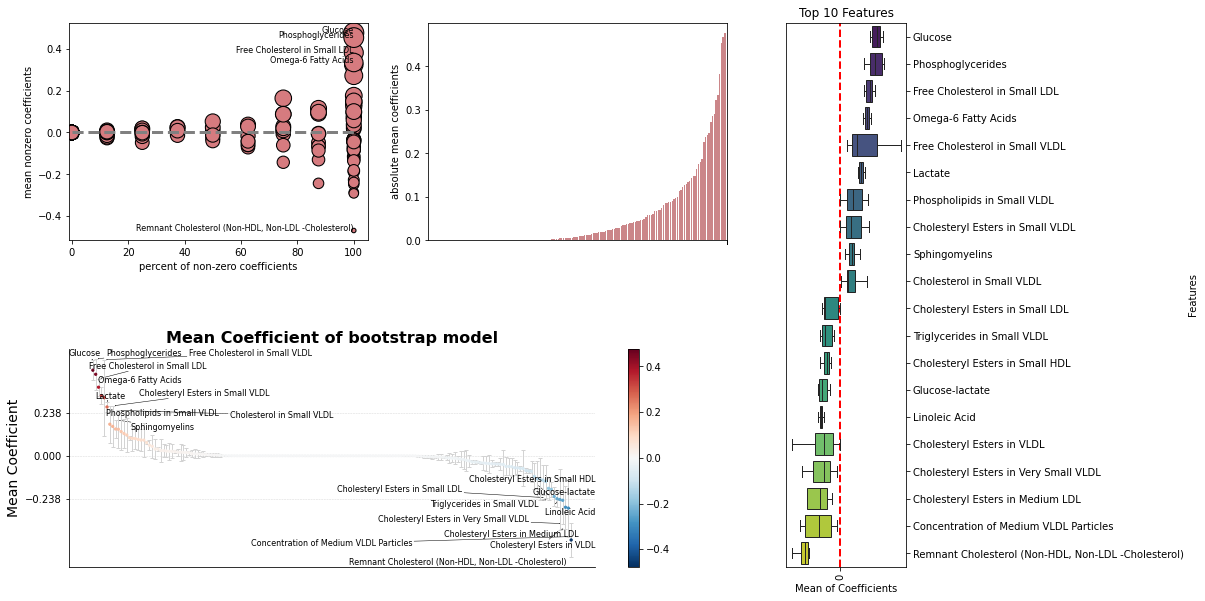

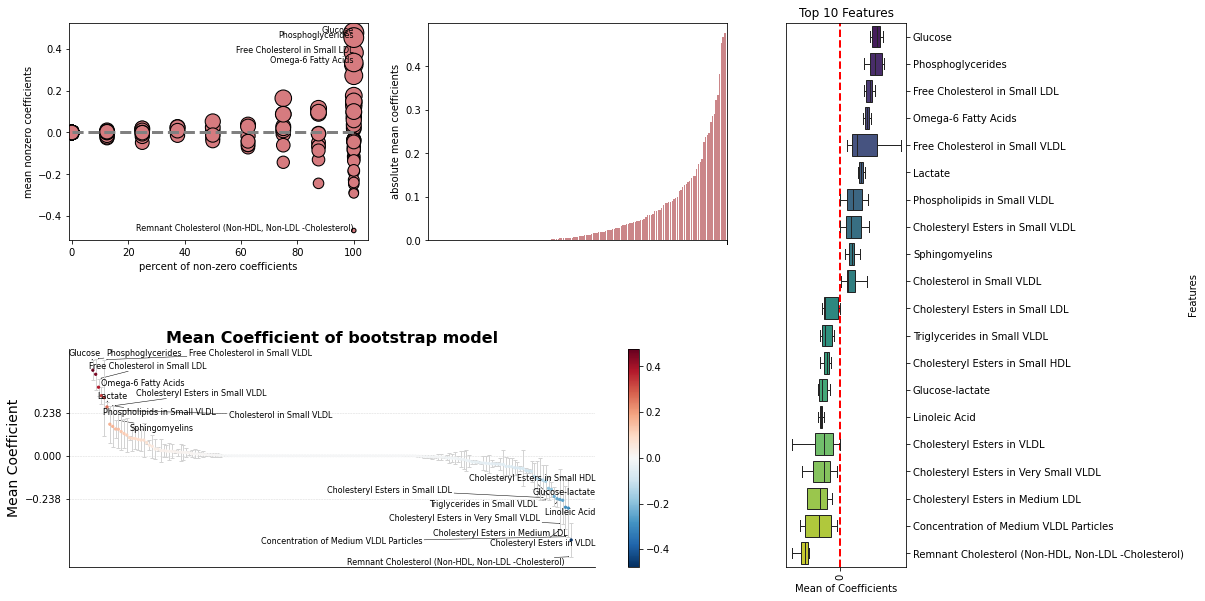

In [9]:
tgtconfig = Config["diseaseData"]
phenoconfig = Config["phenosData"]
testconfig = Config["heldOutData"]
for omics in Config["omicsData"].keys():

    assert omics in Config["modelConfig"].keys(), f"{omics} not in model config"
    mmconfig = Config["modelConfig"][omics]
    dataconfig = Config["omicsData"][omics]
    print(f"Running {omics}")
    LassoTrainTFPipline(
        mmconfig=mmconfig,
        dataconfig=dataconfig,
        tgtconfig=tgtconfig,
        phenoconfig=phenoconfig,
        testdataconfig=testconfig,
    ).run(
        outputFolder=f"./test/{tgtconfig.name}",
        n_bootstrap=mmconfig.get("n_bootstrap", None),
    )

In [14]:
import pandas as pd

RF_test = pd.read_csv(
    f"/home/xutingfeng/ukb/project/ppp_prediction/test/T2D_Coding_Amit_NG2018/Prot/all_score_test.csv"
)
RF_test.i

,eid,single,mean,non_zero_features
0,1048581,0.654592,116509.538843,0.644931
1,1572870,0.120802,174763.429559,0.104801
2,5636111,0.578783,626235.079880,0.571015
3,1179667,0.136954,131074.243211,0.165666
4,2359317,-0.574424,262145.825940,-0.559281
...,...,...,...,...
27995,2228206,-0.236138,247578.229158,-0.257842
27996,4587504,-0.056006,509722.592093,-0.085358
27997,5898228,0.313011,655359.015832,0.389664
27998,1572853,-0.249858,174761.248271,-0.275164
